# In Depth Study of Failures in Education in India

## Correlation between classroom conditions and failure rate in each district

In [159]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from numpy import linalg
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
metadata = pd.read_csv("2015_16_Districtwise_Metadata.csv")

In [30]:
display(metadata[591:612]) # display classroom condition metadata

,Field Name,Description
591,TOTCLGD1G,Total_Classrooms_by_Condition_Good_Condition: ...
592,TOTCLGD2G,Total_Classrooms_by_Condition_Good_Condition: ...
593,TOTCLGD3G,Total_Classrooms_by_Condition_Good_Condition: ...
594,TOTCLGD4G,Total_Classrooms_by_Condition_Good_Condition: ...
595,TOTCLGD5G,Total_Classrooms_by_Condition_Good_Condition: ...
596,TOTCLGD6G,Total_Classrooms_by_Condition_Good_Condition: ...
597,TOTCLGD7G,Total_Classrooms_by_Condition_Good_Condition: ...
598,TOTCLMI1G,Total_Classrooms_by_Condition_Need_Minor_Repai...
599,TOTCLMI2G,Total_Classrooms_by_Condition_Need_Minor_Repai...
600,TOTCLMI3G,Total_Classrooms_by_Condition_Need_Minor_Repai...


In [110]:
data = pd.read_csv("2015_16_Districtwise.csv")
display(data)

,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,SCH3P,SCH4P,SCH5P,SCH6P,SCH7P,SCH9P,SCHTOTP,SCH1M,SCH2M,SCH3M,SCH4M,SCH5M,SCH6M,SCH7M,SCH9M,SCHTOTM,SCH1GR,SCH2GR,SCH3GR,SCH4GR,SCH5GR,SCH6GR,SCH7GR,SCH9GR,SCHTOTGR,SCH1GA,SCH2GA,SCH3GA,SCH4GA,SCH5GA,SCH6GA,SCH7GA,SCH9GA,SCHTOTGA,SCH1PR,SCH2PR,SCH3PR,SCH4PR,SCH5PR,SCH6PR,SCH7PR,SCH9PR,SCHTOTPR,SCHBOY1,SCHBOY2,SCHBOY3,SCHBOY4,SCHBOY5,SCHBOY6,SCHBOY7,SCHBOY9,SCHBOYTOT,SCHGIR1,SCHGIR2,SCHGIR3,SCHGIR4,SCHGIR5,SCHGIR6,SCHGIR7,SCHGIR9,SCHGIRTOT,ENR1,ENR2,ENR3,ENR4,ENR5,ENR6,ENR7,ENR9,ENRTOT,ENR1G,ENR2G,ENR3G,ENR4G,ENR5G,ENR6G,ENR7G,ENR9G,ENRTOTG,ENR1P,ENR2P,ENR3P,ENR4P,ENR5P,ENR6P,ENR7P,ENR9P,ENRTOTP,ENR1M,ENR2M,ENR3M,ENR4M,ENR5M,ENR6M,ENR7M,ENR9M,ENRTOTM,ENR1GR,ENR2GR,ENR3GR,ENR4GR,ENR5GR,ENR6GR,ENR7GR,ENR9GR,ENRTOTGR,ENR1PR,ENR2PR,ENR3PR,ENR4PR,ENR5PR,ENR6PR,ENR7PR,ENR9PR,ENRTOTPR,TCH1G,TCH2G,TCH3G,TCH4G,TCH5G,TCH6G,TCH7G,TCH9G,TCHTOTG,TCH1P,TCH2P,TCH3P,TCH4P,TCH5P,TCH6P,TCH7P,TCH9P,TCHTOTP,TCH1M,TCH2M,TCH3M,TCH4M,TCH5M,TCH6M,TCH7M,TCH9M,TCHTOTM,SCLS1,SCLS2,SCLS3,SCLS4,SCLS5,SCLS6,SCLS7,SCLSTOT,STCH1,STCH2,STCH3,STCH4,STCH5,STCH6,STCH7,STCHTOT,ROAD1,ROAD2,ROAD3,ROAD4,ROAD5,ROAD6,ROAD7,ROADTOT,SPLAY1,SPLAY2,SPLAY3,SPLAY4,SPLAY5,SPLAY6,SPLAY7,SPLAYTOT,SBNDR1,SBNDR2,SBNDR3,SBNDR4,SBNDR5,SBNDR6,SBNDR7,SBNDRTOT,SGTOIL1,SGTOIL2,SGTOIL3,SGTOIL4,SGTOIL5,SGTOIL6,SGTOIL7,SGTOILTOT,SBTOIL1,SBTOIL2,SBTOIL3,SBTOIL4,SBTOIL5,SBTOIL6,SBTOIL7,SBTOILTOT,SWAT1,SWAT2,SWAT3,SWAT4,SWAT5,SWAT6,SWAT7,SWATTOT,SELE1,SELE2,SELE3,SELE4,SELE5,SELE6,SELE7,SELETOT,SCOMP1,SCOMP2,SCOMP3,SCOMP4,SCOMP5,SCOMP6,SCOMP7,SCOMPTOT,SRAM1,SRAM2,SRAM3,SRAM4,SRAM5,SRAM6,SRAM7,SRAMTOT,SRAMN1,SRAMN2,SRAMN3,SRAMN4,SRAMN5,SRAMN6,SRAMN7,SRAMNTOT,ESTD1,ESTD2,ESTD3,ESTD4,ESTD5,ESTD6,ESTD7,ESTDTOT,MDM1,MDM2,MDM3,MDM4,MDM5,MDM6,MDM7,MDMTOT,KIT1,KIT2,KIT3,KIT4,KIT5,KIT6,KIT7,KITTOT,KITS1,KITS2,KITS3,KITS4,KITS5,KITS6,KITS7,KITSTOT,ENR501,ENR502,ENR503,ENR504,ENR505,ENR506,ENR507,ENR509,ENR50TOT,SMC1,SMC2,SMC3,SMC4,SMC5,SMC6,SMC7,SMCTOT,CLS1,CLS2,CLS3,CLS4,CLS5,CLS6,CLS7,CLSTOT,TCH1,TCH2,TCH3,TCH4,TCH5,TCH6,TCH7,TCHTOT,TCHF1,TCHF2,TCHF3,TCHF4,TCHF5,TCHF6,TCHF7,TCHFTOT,TCHM1,TCHM2,TCHM3,TCHM4,TCHM5,TCHM6,TCHM7,TCHM9,ENRG1,ENRG2,ENRG3,ENRG4,ENRG5,ENRG6,ENRG7,ENRGTOT,PREP,PRESTD,PPFTCH,PPMTCH,PMTCH,PFTCH,TCHSCM1,TCHSCM2,TCHSCM3,TCHSCM4,TCHSCM5,TCHSCM6,TCHSCM7,TCHSCF1,TCHSCF2,TCHSCF3,TCHSCF4,TCHSCF5,TCHSCF6,TCHSCF7,TCHSTM1,TCHSTM2,TCHSTM3,TCHSTM4,TCHSTM5,TCHSTM6,TCHSTM7,TCHSTF1,TCHSTF2,TCHSTF3,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,C3_BR,C4_BR,C5_BR,C6_BR,C7_BR,C8_BR,C9_BR,C1_GR,C2_GR,C3_GR,C4_GR,C5_GR,C6_GR,C7_GR,C8_GR,C9_GR,SCPTOT,SCPTOT_G,SCUTOT,SCUTOT_G,STPTOT,STPTOT_G,STUTOT,STUTOT_G,OBPTOT,OBUTOT,OBPTOT_G,OBUTOT_G,MUPTOT,MUUTOT,MUPTOT_G,MUUTOT_G,BLC1,LVC1,HEC1,SPC1,LOC1,MEC1,LEC1,CPC1,AUC1,MUC1,BLC2,LVC2,HEC2,SPC2,LOC2,MEC2,LEC2,CPC2,AUC2,MUC2,BLC3,LVC3,HEC3,SPC3,LOC3,MEC3,LEC3,CPC3,AUC3,MUC3,BLC4,LVC4,HEC4,SPC4,LOC4,MEC4,LEC4,CPC4,AUC4,MUC4,BLC5,LVC5,HEC5,SPC5,LOC5,MEC5,LEC5,CPC5,AUC5,MUC5,BLC6,LVC6,HEC6,SPC6,LOC6,MEC6,LEC6,CPC6,AUC6,MUC6,BLC7,LVC7,HEC7,SPC7,LOC7,MEC7,LEC7,CPC7,AUC7,MUC7,BLC8,LVC8,HEC8,SPC8,LOC8,MEC8,LEC8,CPC8,AUC8,MUC8,TOTCLGD1G,TOTCLGD2G,TOTCLGD3G,TOTCLGD4G,TOTCLGD5G,TOTCLGD6G,TOTCLGD7G,TOTCLMI1G,TOTCLMI2G,TOTCLMI3G,TOTCLMI4G,TOTC

(array([ 76.,  76.,  96., 103.,  73.,  56.,  46.,  41.,  38.,  14.,   8.,
          9.,  10.,   5.,   8.,   4.,   0.,   3.,   0.,   2.,   0.,   1.,
          2.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-1.00628147, -0.80882247, -0.61136346, -0.41390445, -0.21644545,
        -0.01898644,  0.17847256,  0.37593157,  0.57339057,  0.77084958,
         0.96830859,  1.16576759,  1.3632266 ,  1.5606856 ,  1.75814461,
         1.95560361,  2.15306262,  2.35052163,  2.54798063,  2.74543964,
         2.94289864,  3.14035765,  3.33781665,  3.53527566,  3.73273467,
         3.93019367,  4.12765268,  4.32511168,  4.52257069,  4.72002969,
         4.9174887 ,  5.1149477 ,  5.31240671,  5.50986572,  5.70732472,
         5.90478373,  6.10224273,  6.29970174,  6.49716074,  6.69461975,
         6.89207876,  7.08953776,  7.28699677,  7.48445577,  7

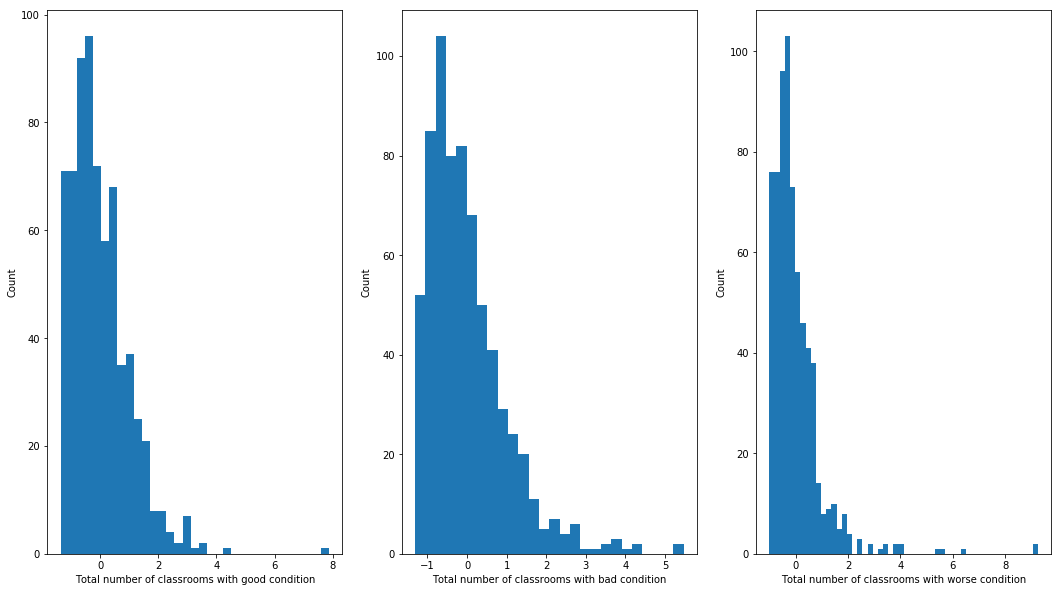

In [170]:
# Get total number of classrooms with a good, bad, and worse condition in each district
classroom_good = ["TOTCLGD%dG" % i for i in np.arange(1, 8)]
classroom_good_data = sum([data[fn] for fn in classroom_good])
classroom_bad = ["TOTCLMI%dG" % i for i in np.arange(1, 8)] # need minor repair
classroom_bad_data = sum([data[fn] for fn in classroom_bad])
classroom_worse = ["TOTCLMJ%dG" % i for i in np.arange(1, 8)] # need major repair
classroom_worse_data = sum([data[fn] for fn in classroom_worse])

# normalize data
crg_mean = np.mean(classroom_good_data)
crg_std = np.std(classroom_good_data)
crg_z = (classroom_good_data - crg_mean) / crg_std

crb_mean = np.mean(classroom_bad_data)
crb_std = np.std(classroom_bad_data)
crb_z = (classroom_bad_data - crb_mean) / crb_std

crw_mean = np.mean(classroom_worse_data)
crw_std = np.std(classroom_worse_data)
crw_z = (classroom_worse_data - crw_mean) / crw_std

# plot
plt.figure(figsize=(18, 10))

plt.subplot(131)
plt.xlabel("Total number of classrooms with good condition")
plt.ylabel("Count")
plt.hist(crg_z, bins="auto")

plt.subplot(132)
plt.xlabel("Total number of classrooms with bad condition")
plt.ylabel("Count")
plt.hist(crb_z, bins="auto")

plt.subplot(133)
plt.xlabel("Total number of classrooms with worse condition")
plt.ylabel("Count")
plt.hist(crw_z, bins="auto")

(array([275.,  95.,  58.,  48.,  39.,  21.,  21.,  18.,  12.,  15.,   9.,
          7.,  11.,   7.,   5.,   3.,   5.,   3.,   3.,   4.,   2.,   4.,
          1.,   3.,   4.,   3.,   0.,   2.,   0.,   0.,   0.,   2.]),
 array([    0.     ,   601.96875,  1203.9375 ,  1805.90625,  2407.875  ,
         3009.84375,  3611.8125 ,  4213.78125,  4815.75   ,  5417.71875,
         6019.6875 ,  6621.65625,  7223.625  ,  7825.59375,  8427.5625 ,
         9029.53125,  9631.5    , 10233.46875, 10835.4375 , 11437.40625,
        12039.375  , 12641.34375, 13243.3125 , 13845.28125, 14447.25   ,
        15049.21875, 15651.1875 , 16253.15625, 16855.125  , 17457.09375,
        18059.0625 , 18661.03125, 19263.     ]),
 <a list of 32 Patch objects>)

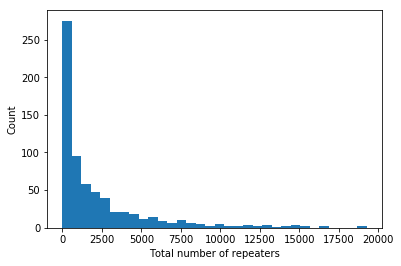

In [145]:
# Get total number of repeaters in each district
repeaters = ["C%d_%sR" % (i, s) for s in ["B", "G"] for i in np.arange(1, 10)]
repeaters_data = sum([data[fn] for fn in repeaters]) # total number of repeaters by district

# normalize data

plt.figure()
plt.xlabel("Total number of repeaters")
plt.ylabel("Count")
plt.hist(repeaters_data, bins="auto")

a = 0.606730965280439
b = 7471.290564361565
R^2 = 0.0960203495245348
p-value = 1.3395194249218407e-16
std. error = 0.07149554797908401


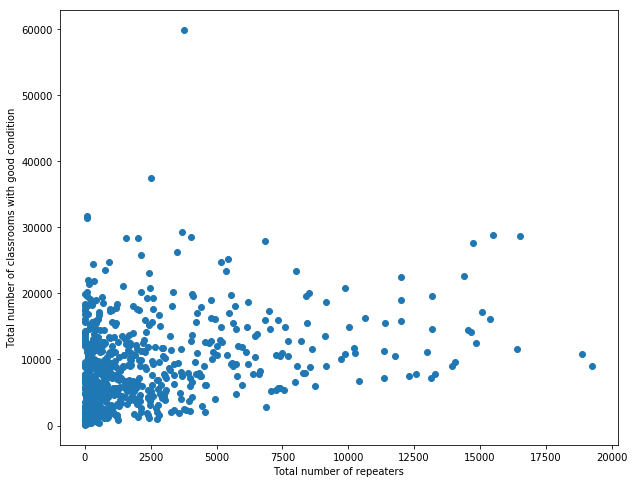

In [165]:
plt.figure(figsize=(10, 8))
plt.xlabel("Total number of repeaters")
plt.ylabel("Total number of classrooms with good condition")
plt.plot(repeaters_data, classroom_good_data, "o")

# linear regression
a, b, r, p, std_err = stats.linregress(repeaters_data, classroom_good_data)
print("a =", a)
print("b =", b)
print("R^2 =", r ** 2)
print("p-value =", p)
print("std. error =", std_err)